In [188]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [189]:
os.chdir("D:/DataScience/Python Part 2/Class 14/Assignment/Case 1")
os.listdir()

['Data.docx', 'voice.csv', '~$Data.docx']

In [190]:
rdata=pd.read_csv('voice.csv')
rdata.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [191]:
rdata.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [192]:
rdata.describe(include='all')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1584
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,NaN
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,NaN
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,NaN
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,NaN
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,NaN
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,NaN


In [193]:
#Finding '0' values-

(rdata==0).sum()

meanfreq      0
sd            0
median        0
Q25           0
Q75           0
IQR           0
skew          0
kurt          0
sp.ent        0
sfm           0
mode        236
centroid      0
meanfun       0
minfun        0
maxfun        0
meandom       0
mindom        0
maxdom        0
dfrange      65
modindx      65
label         0
dtype: int64

In [194]:
#covert '0' to NaN

rdata=rdata.replace(0,np.NaN)
rdata
(rdata==0).sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [195]:
#Finding Missing values
rdata.isnull().sum()

meanfreq      0
sd            0
median        0
Q25           0
Q75           0
IQR           0
skew          0
kurt          0
sp.ent        0
sfm           0
mode        236
centroid      0
meanfun       0
minfun        0
maxfun        0
meandom       0
mindom        0
maxdom        0
dfrange      65
modindx      65
label         0
dtype: int64

In [196]:
rdata.keys()
rdata.shape

(3168, 21)

In [197]:
rdata['mode']=rdata['mode'].fillna(rdata.mean()['mode'])


In [198]:
rdata.isnull().sum()

meanfreq     0
sd           0
median       0
Q25          0
Q75          0
IQR          0
skew         0
kurt         0
sp.ent       0
sfm          0
mode         0
centroid     0
meanfun      0
minfun       0
maxfun       0
meandom      0
mindom       0
maxdom       0
dfrange     65
modindx     65
label        0
dtype: int64

In [201]:
rdata['dfrange']=rdata['dfrange'].fillna(method='bfill')

In [199]:
rdata['modindx']=rdata['modindx'].fillna(method='bfill')

In [212]:
rdata.isnull().sum()

cdata=rdata
cdata.shape

(3168, 21)

In [210]:
#Make dummy values

dlabel=pd.get_dummies(cdata['label'],drop_first=True)
#dlabel

In [214]:
data_wl=cdata.drop(['label'],axis=1)
data_wl.head()
data_wl.shape

(3168, 20)

In [217]:
#Concatination
datao=pd.concat([data_wl,dlabel],axis=1)
datao.shape
datao.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.046875,0.052632,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [219]:
#Checking Outliers

Q1=datao.quantile(0.25)
Q3=datao.quantile(0.75)
IQR=1.5*(Q3-Q1)
IQR


meanfreq     0.053226
sd           0.037600
median       0.061538
Q25          0.097278
Q75          0.052371
IQR          0.107423
skew         1.923188
kurt        11.969038
sp.ent       0.100354
sfm          0.413453
mode         0.101674
centroid     0.053226
meanfun      0.078873
minfun       0.044521
maxfun       0.035233
meandom      1.136007
mindom       0.093750
maxdom       7.406250
dfrange      6.902344
modindx      0.161863
male         1.500000
dtype: float64

In [265]:
((datao<Q1-IQR)|(datao>Q3+IQR))

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male
0,True,False,True,False,True,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,True,False,True,False,True,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2,True,False,True,True,True,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [224]:
data=datao[~((datao<Q1-IQR)|(datao>Q3+IQR)).any(axis=1)]
data.shape
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1


In [225]:
x=data.drop('male',axis=1)
x


In [228]:
y=data['male']
#y

In [229]:
#Splitting

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=52)


In [230]:
x_train.shape

(1444, 20)

In [231]:
x_test.shape

(620, 20)

In [234]:
y_train_matrix=y_train.replace(-1,1)

In [235]:
y_test_matrix=y_test.replace(-1,1)

In [237]:
#Making Model

#svc=SVC(kernel='linear',C=C,decision_function_shape='ovr')
svc=SVC(kernel='linear')


model=svc.fit(x_train,y_train_matrix)

In [238]:
#Prediction

y_pred=model.predict(x_test)

In [239]:
#Accuracy
"Accuracy:",accuracy_score(y_test_matrix,y_pred)

('Accuracy:', 0.9354838709677419)

In [253]:
#Tuning The Model
C=1
parameters=[{'C':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}]


newmodel=GridSearchCV(SVC(kernel='linear',C=C,decision_function_shape='ovr'),parameters,cv=5)

#newmodel=GridSearchCV(svm.SVC(decision_function_shape='ovr',kernel='linear'),parameters,cv=5)
newmodel.fit(x_train,y_train_matrix)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1718, 19, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [247]:
print(newmodel.best_params_)

{'C': 19}


In [254]:
y_pred=newmodel.predict(x_test)

In [255]:
#Accuracy
"Accuracy:",accuracy_score(y_test_matrix,y_pred)

('Accuracy:', 0.9758064516129032)

In [257]:
"Classification:",classification_report(y_test_matrix,y_pred)

('Classification:',
 '              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.97       294\n           1       0.98      0.98      0.98       326\n\n   micro avg       0.98      0.98      0.98       620\n   macro avg       0.98      0.98      0.98       620\nweighted avg       0.98      0.98      0.98       620\n')

In [263]:
c=np.array(confusion_matrix(y_test_matrix,y_pred))
confusion=pd.DataFrame(c)
confusion

,0,1
0,286,8
1,7,319


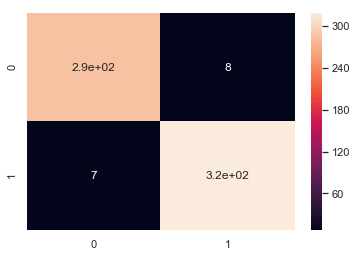

In [264]:
sns.heatmap(confusion,annot=True)